**Prática de Segmentação de imagens**

In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

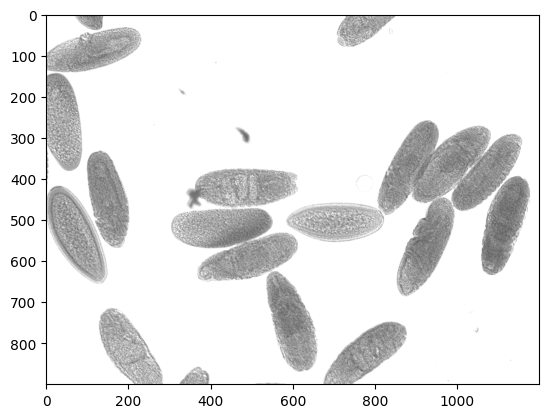

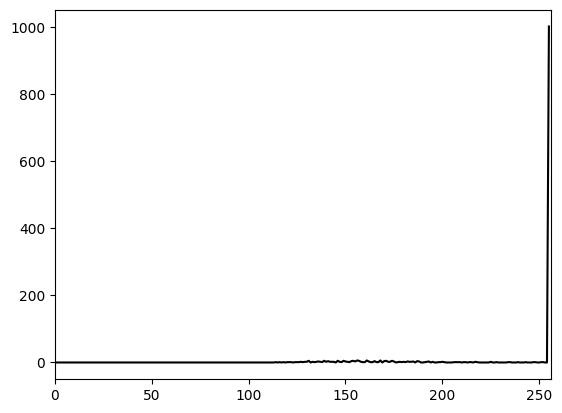

In [3]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

def read_image(filename):
  img = cv2.imread(filename, 0)
  return img

image = read_image('./insitu107595.jpg')
hist = cv2.calcHist(image, [0], None, [256], [0, 256])

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show(block=False)
plt.close()

plt.plot(hist, color='k')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()

#A partir do histograma pode se definir o threshold arbitrário de 252


2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

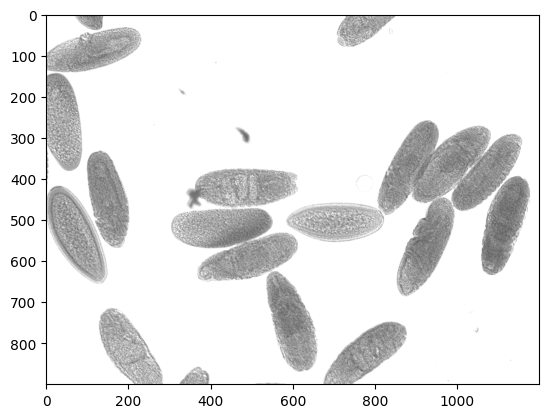

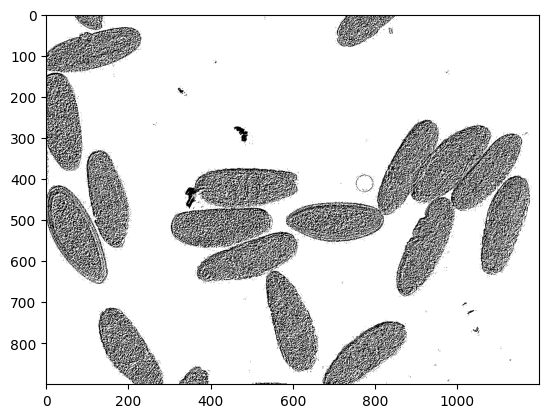

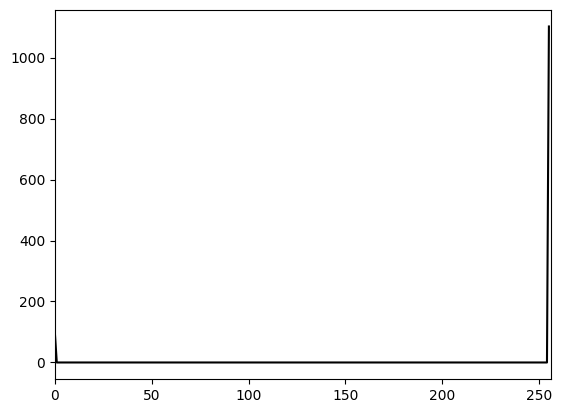

In [4]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show(block=False)
plt.close()

def read_image(filename):
  img = cv2.imread(filename, 0)
  return img

def get_adaptative_threshold(image, block):
  height, width = image.shape
  new_image = np.zeros((height, width), dtype=np.uint8)
  
  for i in range(height):
    for j in range(width):
      min_x = max(0, i - block // 2)
      max_x = min(height - 1, i + block // 2)
      min_y = max(0, j - block // 2)
      max_y = min(width - 1, j + block // 2)
      cluster = image[min_x: max_x, min_y: max_y]
      threshold = np.mean(cluster)

      if image[i, j] >= threshold:
        new_image[i, j] = 255

  return new_image

image = read_image('./insitu107595.jpg')
adapted_image = get_adaptative_threshold(image, 3)

plt.imshow(adapted_image, cmap='gray', vmin=0, vmax=255)
plt.show(block=False)
plt.close()

hist = cv2.calcHist(adapted_image, [0], None, [256], [0, 256])
plt.plot(hist, color='k')
plt.xlim([0, 256])
plt.show(block=False)
plt.close()

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

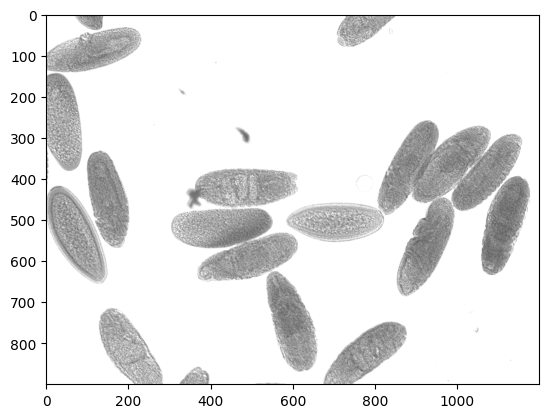

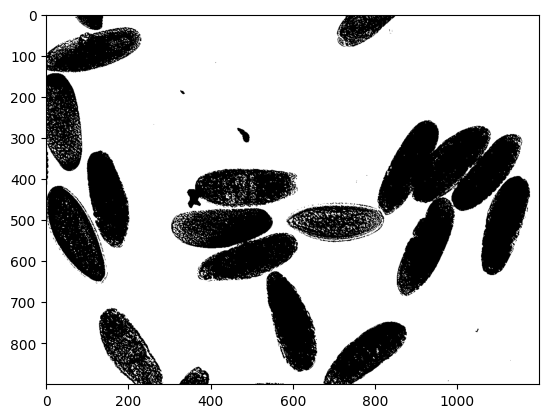

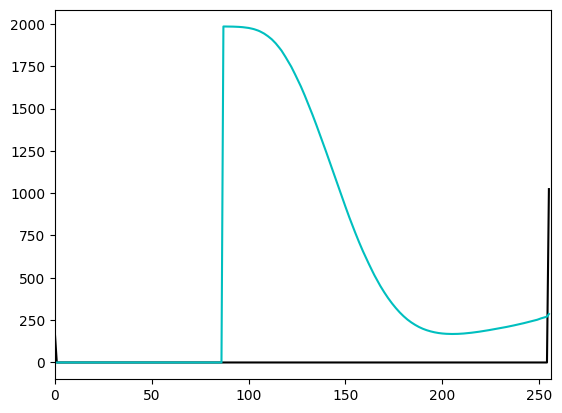

In [5]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show(block=False)
plt.close()

def read_image(filename):
  img = cv2.imread(filename, 0)
  return img


def get_otsu_criteria(image, threshold, variances):
  thresholded = np.zeros(image.shape)
  thresholded[image >= threshold] = 1

  nb_pixels = image.size
  nb_pixels_1 = np.count_nonzero(thresholded)
  weigth1 = nb_pixels_1 / nb_pixels
  weight0 = 1 - weigth1

  if weigth1 == 0 or weight0 == 0:
    variances.append(0)
    return np.inf
  
  pixels_1 = image[thresholded == 1]
  pixels_0 = image[thresholded == 0]

  var_1 = np.var(pixels_1) if len(pixels_1) > 0 else 0
  var_0 = np.var(pixels_0) if len(pixels_0) > 0 else 0

  variances.append(weight0 * var_0 + weigth1 * var_1)
  return weight0 * var_0 + weigth1 * var_1


def get_otsu_threshold(image):
  thresh_range = range(np.max(image) + 1)
  variances = []
  criterias = np.array([get_otsu_criteria(image, th, variances) for th in thresh_range])

  best = thresh_range[np.argmin(criterias)]
  binary = image
  binary[binary > best] = 255
  binary[binary <= best] = 0

  plt.imshow(binary, cmap='gray', vmin=0, vmax=255)
  plt.show(block=False)
  plt.close()

  hist = cv2.calcHist(binary, [0], None, [256], [0, 256])
  plt.plot(hist, color='k')
  plt.plot(variances, color='c')
  plt.xlim([0, 256])
  plt.show(block=False)
  plt.close()

  return binary, variances

image = read_image('./insitu107595.jpg')
otsu, otsu_variances = get_otsu_threshold(image)


In [ ]:
4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

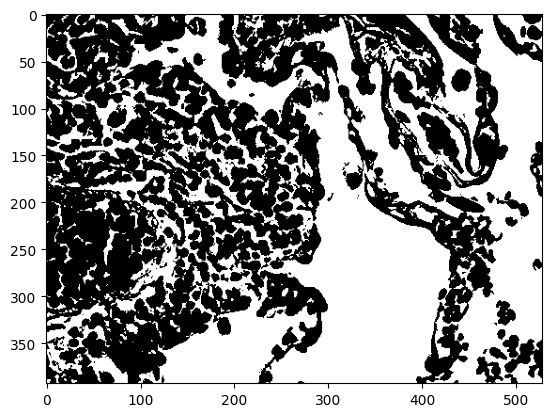

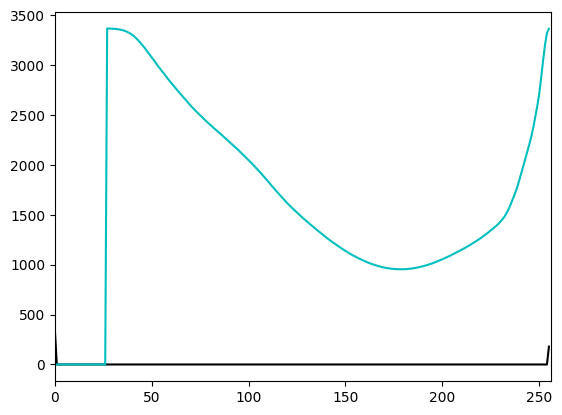

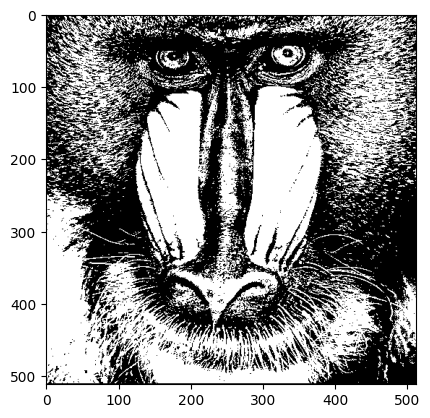

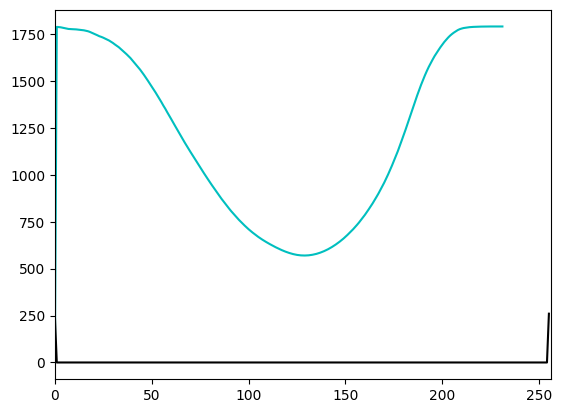

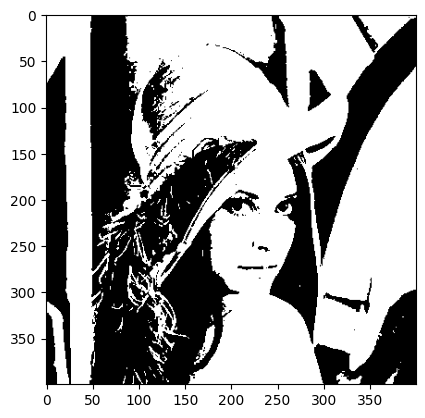

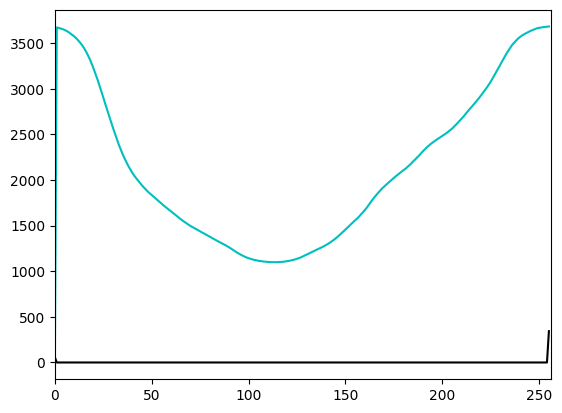

(array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 [0,
  3673.233481288518,
  3667.887256502932,
  3661.4455652879183,
  3654.9269519189243,
  3646.0499904402927,
  3634.281608751315,
  3623.2912422576737,
  3607.350301609398,
  3592.7237606598933,
  3574.980231160371,
  3555.7347897601003,
  3531.6278902990207,
  3507.7040533492386,
  3480.1158277780028,
  3449.1040545951882,
  3412.4181178430417,
  3371.5762626548367,
  3326.2087922334968,
  3275.507315679564,
  3221.405772545953,
  3163.1491029630197,
  3103.3898386780043,
  3037.9801737358375,
  2969.3772926122892,
  2905.4443529306727,
  2836.158780425466,
  2771.751470925706,
  2703.9667686446937,
  2637.2074934174734,
  2572.6199875494854,
  2510.2049803140544,
  2449.0975493128153,
  

In [8]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

image_2 = read_image('./HE.jpg')
get_otsu_threshold(image_2)

image_3 = read_image('./madrill.tiff')
get_otsu_threshold(image_3)

image_4 = read_image('./Lenna.jpg')
get_otsu_threshold(image_4)